In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

In [71]:
df = sns.load_dataset('flights')
df['yearMonth'] = pd.to_datetime("01-"+df['month'].astype(str)+"-"+df['year'].astype(str))
df.set_index('yearMonth',inplace=True)
df.head()

,year,month,passengers
yearMonth,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


<Axes: xlabel='yearMonth', ylabel='passengers'>

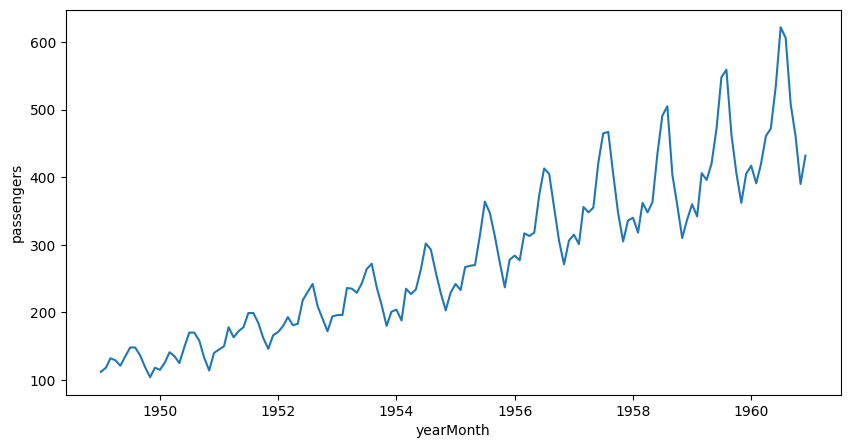

In [4]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x=df.index,y=df.passengers)

In [5]:
df['rollMean']  = df.passengers.rolling(window=12).mean()
df['rollStd']  = df.passengers.rolling(window=12).std()

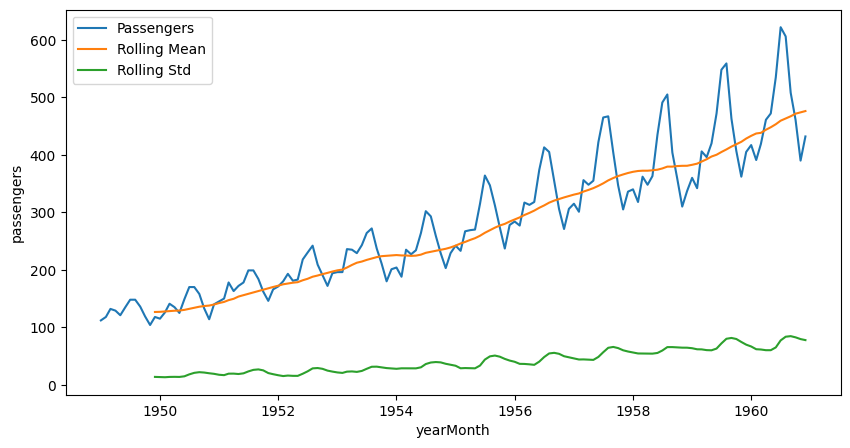

In [6]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x=df.index, y=df.passengers, label='Passengers')
sns.lineplot(data=df, x=df.index, y=df.rollMean, label='Rolling Mean')
sns.lineplot(data=df, x=df.index, y=df.rollStd, label='Rolling Std')
plt.legend()

In [7]:
from statsmodels.tsa.stattools import adfuller

In [8]:
adfTest = adfuller(df['passengers'],autolag='AIC',)

In [9]:
adfTest

(0.8153688792060482,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [10]:
stats = pd.Series(adfTest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
stats

Test Statistic                   0.815369
p-value                          0.991880
#lags used                      13.000000
number of observations used    130.000000
dtype: float64

In [11]:
for key, values in adfTest[4].items():
    print('criticality',key,":",values)

criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


In [12]:
def test_stationarity(dataFrame, var):
    dataFrame['rollMean']  = dataFrame[var].rolling(window=12).mean()
    dataFrame['rollStd']  = dataFrame[var].rolling(window=12).std()
    
    from statsmodels.tsa.stattools import adfuller
    adfTest = adfuller(dataFrame[var],autolag='AIC')
    stats = pd.Series(adfTest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
    print(stats)
    
    for key, values in adfTest[4].items():
        print('criticality',key,":",values)
        
    sns.lineplot(data=dataFrame,x=dataFrame.index,y=var)
    sns.lineplot(data=dataFrame,x=dataFrame.index,y='rollMean', label='Rolling Mean')
    sns.lineplot(data=dataFrame,x=dataFrame.index,y='rollStd', label='Rolling Std')


In [13]:
air_df = df[['passengers']]
air_df.head()

,passengers
yearMonth,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [14]:
air_df['shift'] = air_df.passengers.shift()
air_df['shiftDiff'] = air_df['passengers'] - air_df['shift']
air_df.head()

C:\Users\Harshita\AppData\Local\Temp\ipykernel_12324\4001457506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df['shift'] = air_df.passengers.shift()
C:\Users\Harshita\AppData\Local\Temp\ipykernel_12324\4001457506.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df['shiftDiff'] = air_df['passengers'] - air_df['shift']


,passengers,shift,shiftDiff
yearMonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,112.0,6.0
1949-03-01,132,118.0,14.0
1949-04-01,129,132.0,-3.0
1949-05-01,121,129.0,-8.0


Test Statistic                  -2.829267
p-value                          0.054213
#lags used                      12.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


C:\Users\Harshita\AppData\Local\Temp\ipykernel_12324\349877916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean']  = dataFrame[var].rolling(window=12).mean()
C:\Users\Harshita\AppData\Local\Temp\ipykernel_12324\349877916.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd']  = dataFrame[var].rolling(window=12).std()


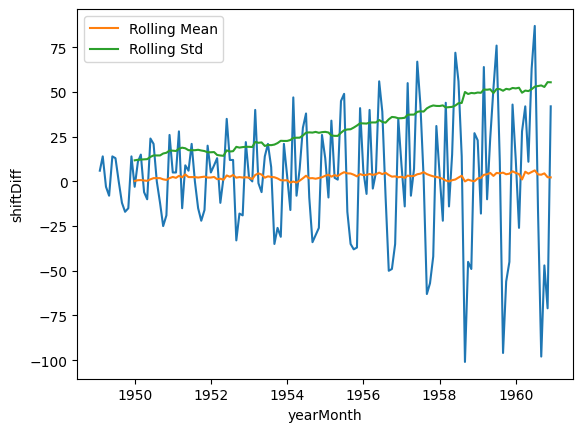

In [15]:
test_stationarity(air_df.dropna(),'shiftDiff')

In [16]:
log_df = df[['passengers']]
log_df['log'] = np.log(log_df['passengers'])
log_df.head()

C:\Users\Harshita\AppData\Local\Temp\ipykernel_12324\3829350932.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df['log'] = np.log(log_df['passengers'])


,passengers,log
yearMonth,,
1949-01-01,112,4.718499
1949-02-01,118,4.770685
1949-03-01,132,4.882802
1949-04-01,129,4.859812
1949-05-01,121,4.795791


Test Statistic                  -1.717017
p-value                          0.422367
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


C:\Users\Harshita\AppData\Local\Temp\ipykernel_12324\349877916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean']  = dataFrame[var].rolling(window=12).mean()
C:\Users\Harshita\AppData\Local\Temp\ipykernel_12324\349877916.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd']  = dataFrame[var].rolling(window=12).std()


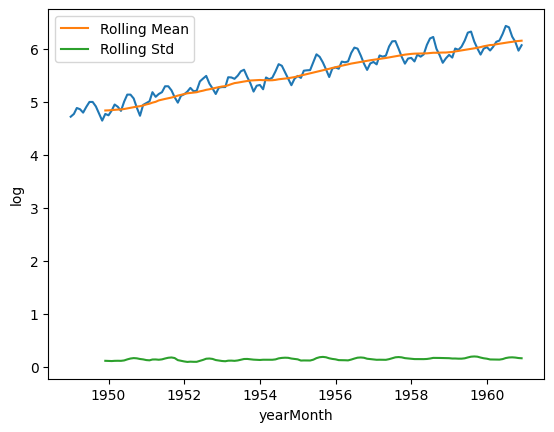

In [17]:
test_stationarity(log_df,'log')

In [18]:
sqrt_df = df[['passengers']]
sqrt_df['sqrt'] = np.sqrt(df['passengers'])
sqrt_df.head()

C:\Users\Harshita\AppData\Local\Temp\ipykernel_12324\2486983579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sqrt_df['sqrt'] = np.sqrt(df['passengers'])


,passengers,sqrt
yearMonth,,
1949-01-01,112,10.583005
1949-02-01,118,10.862780
1949-03-01,132,11.489125
1949-04-01,129,11.357817
1949-05-01,121,11.000000


Test Statistic                  -0.345854
p-value                          0.918754
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


C:\Users\Harshita\AppData\Local\Temp\ipykernel_12324\349877916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean']  = dataFrame[var].rolling(window=12).mean()
C:\Users\Harshita\AppData\Local\Temp\ipykernel_12324\349877916.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd']  = dataFrame[var].rolling(window=12).std()


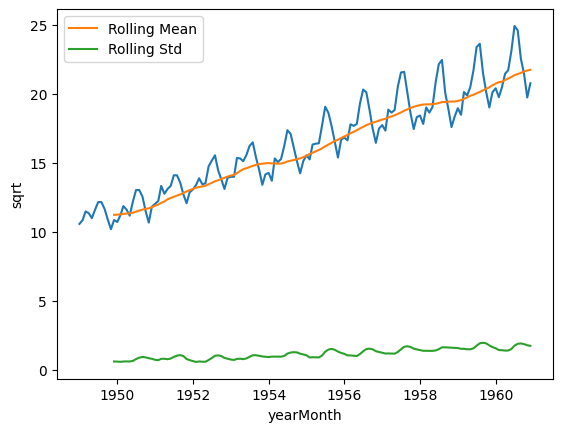

In [19]:
test_stationarity(sqrt_df,'sqrt')

In [20]:
cbrt_df = df[['passengers']]
cbrt_df['cbrt'] = np.cbrt(cbrt_df['passengers'])
cbrt_df.head()

C:\Users\Harshita\AppData\Local\Temp\ipykernel_12324\2059959342.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbrt_df['cbrt'] = np.cbrt(cbrt_df['passengers'])


,passengers,cbrt
yearMonth,,
1949-01-01,112,4.820285
1949-02-01,118,4.904868
1949-03-01,132,5.091643
1949-04-01,129,5.052774
1949-05-01,121,4.946087


C:\Users\Harshita\AppData\Local\Temp\ipykernel_12324\349877916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean']  = dataFrame[var].rolling(window=12).mean()
C:\Users\Harshita\AppData\Local\Temp\ipykernel_12324\349877916.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd']  = dataFrame[var].rolling(window=12).std()


Test Statistic                  -0.810035
p-value                          0.816157
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


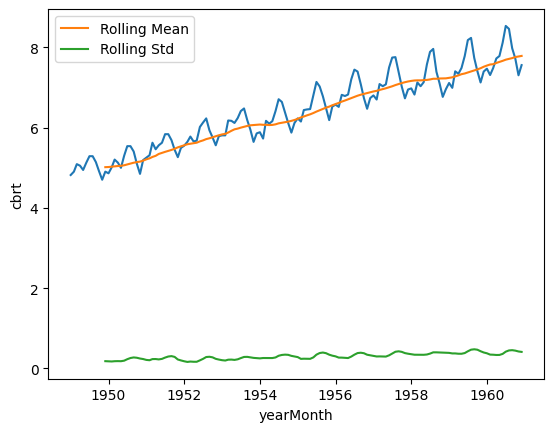

In [21]:
test_stationarity(cbrt_df,'cbrt')

In [22]:
log_df2 = log_df[['passengers','log']]
log_df2['log_sqrt'] = np.sqrt(log_df['log'])
log_df2['logShiftDiff'] = log_df2['log_sqrt'] - log_df2['log_sqrt'].shift()
log_df2.head()

C:\Users\Harshita\AppData\Local\Temp\ipykernel_12324\3089291636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df2['log_sqrt'] = np.sqrt(log_df['log'])


,passengers,log,log_sqrt,logShiftDiff
yearMonth,,,,
1949-01-01,112,4.718499,2.172211,NaN
1949-02-01,118,4.770685,2.184190,0.011979
1949-03-01,132,4.882802,2.209706,0.025517
1949-04-01,129,4.859812,2.204498,-0.005208
1949-05-01,121,4.795791,2.189929,-0.014569


Test Statistic                  -2.611019
p-value                          0.090741
#lags used                      14.000000
number of observations used    128.000000
dtype: float64
criticality 1% : -3.4825006939887997
criticality 5% : -2.884397984161377
criticality 10% : -2.578960197753906


C:\Users\Harshita\AppData\Local\Temp\ipykernel_12324\349877916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean']  = dataFrame[var].rolling(window=12).mean()
C:\Users\Harshita\AppData\Local\Temp\ipykernel_12324\349877916.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd']  = dataFrame[var].rolling(window=12).std()


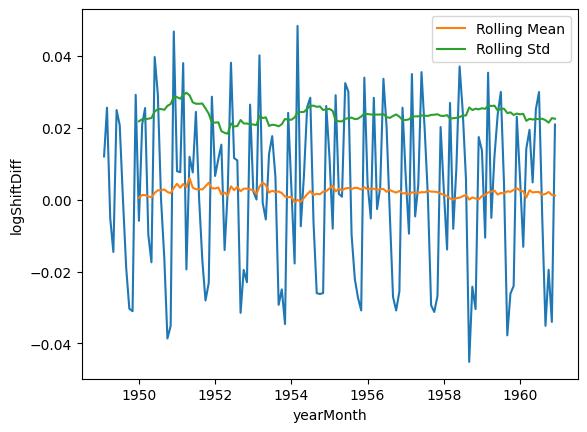

In [23]:
test_stationarity(log_df2.dropna(),'logShiftDiff')

In [24]:
log_shift = df[['passengers']].copy(deep=True)
log_shift['log'] = np.log(log_shift['passengers'])
log_shift['logShift'] = log_shift['log'].shift()
log_shift['logShiftDiff'] = log_shift['log'] - log_shift['logShift']
log_shift.head()

,passengers,log,logShift,logShiftDiff
yearMonth,,,,
1949-01-01,112,4.718499,NaN,NaN
1949-02-01,118,4.770685,4.718499,0.052186
1949-03-01,132,4.882802,4.770685,0.112117
1949-04-01,129,4.859812,4.882802,-0.022990
1949-05-01,121,4.795791,4.859812,-0.064022


Test Statistic                  -2.717131
p-value                          0.071121
#lags used                      14.000000
number of observations used    128.000000
dtype: float64
criticality 1% : -3.4825006939887997
criticality 5% : -2.884397984161377
criticality 10% : -2.578960197753906


C:\Users\Harshita\AppData\Local\Temp\ipykernel_12324\349877916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean']  = dataFrame[var].rolling(window=12).mean()
C:\Users\Harshita\AppData\Local\Temp\ipykernel_12324\349877916.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd']  = dataFrame[var].rolling(window=12).std()


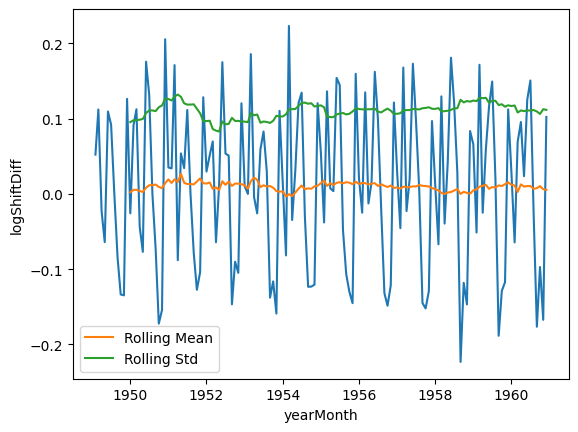

In [25]:
test_stationarity(log_shift.dropna(),'logShiftDiff')

In [26]:
airP = df[['passengers']].copy(deep=True)
airP['firstDiff'] = airP['passengers'].diff()
airP['Diff12'] = airP['passengers'].diff(12)

In [27]:
airP.head()

,passengers,firstDiff,Diff12
yearMonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,NaN
1949-04-01,129,-3.0,NaN
1949-05-01,121,-8.0,NaN


In [37]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

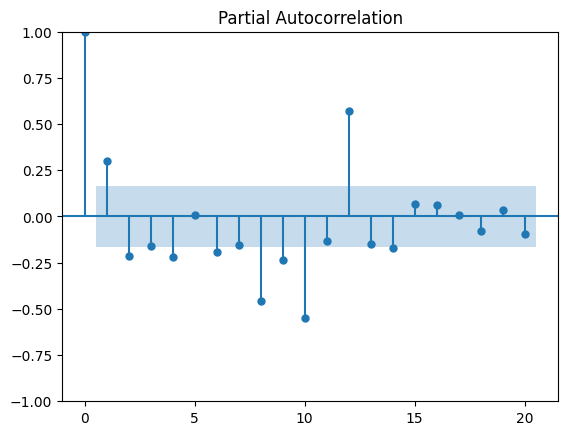

In [38]:
plot_pacf(airP['firstDiff'].dropna(),lags=20);

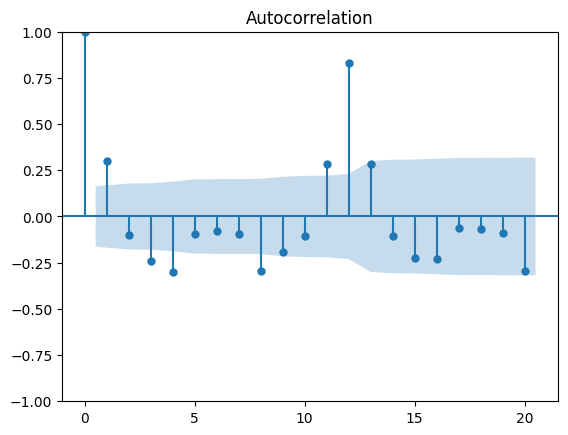

In [39]:
plot_acf(airP['firstDiff'].dropna(),lags=20);

In [40]:
train = airP[:round(len(airP)*70/100)]
test = airP[round(len(airP)*70/100):]
test.head()

,passengers,firstDiff,Diff12,arimaPred
yearMonth,,,,
1957-06-01,422,67.0,48.0,363.295709
1957-07-01,465,43.0,52.0,351.699792
1957-08-01,467,2.0,62.0,346.961970
1957-09-01,404,-63.0,49.0,344.344094
1957-10-01,347,-57.0,41.0,342.897590


In [41]:
model = ARIMA(train['passengers'],order=(1,1,3))
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
airP['arimaPred'] = prediction
airP.tail()

C:\Users\Harshita\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Harshita\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Harshita\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,passengers,firstDiff,Diff12,arimaPred
yearMonth,,,,
1960-08-01,606,-16.0,47.0,341.111333
1960-09-01,508,-98.0,45.0,341.111333
1960-10-01,461,-47.0,54.0,341.111333
1960-11-01,390,-71.0,28.0,341.111333
1960-12-01,432,42.0,27.0,341.111333


<Axes: xlabel='yearMonth', ylabel='passengers'>

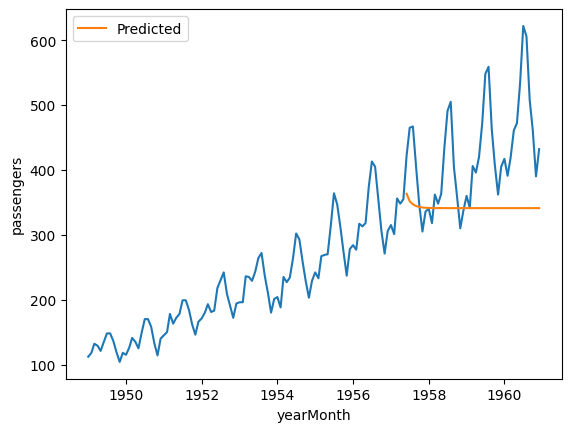

In [43]:
airP.dropna()
sns.lineplot(data=airP,x=airP.index,y='passengers')
sns.lineplot(data=airP,x=airP.index,y='arimaPred', label='Predicted')

In [44]:
from sklearn.metrics import mean_squared_error

In [45]:
np.sqrt(mean_squared_error(test['passengers'],prediction))

111.1101033142743

In [46]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

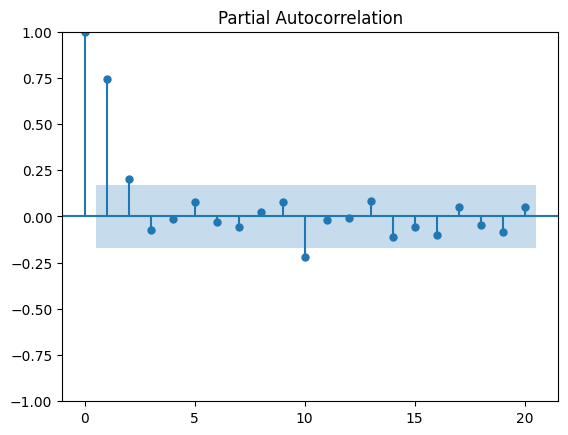

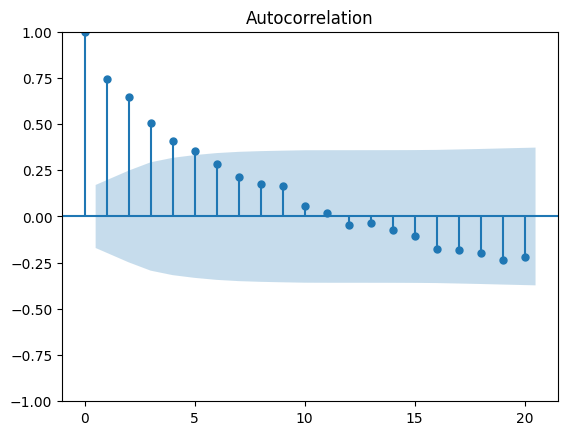

In [47]:
plot_pacf(airP['Diff12'].dropna(),lags=20);
plot_acf(airP['Diff12'].dropna(),lags=20);

In [48]:
model = SARIMAX(train['passengers'],order=(1,1,3),seasonal_order=(2,1,2,12))
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
airP['sarimaxPred'] = prediction

C:\Users\Harshita\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Harshita\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Harshita\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<Axes: xlabel='yearMonth', ylabel='passengers'>

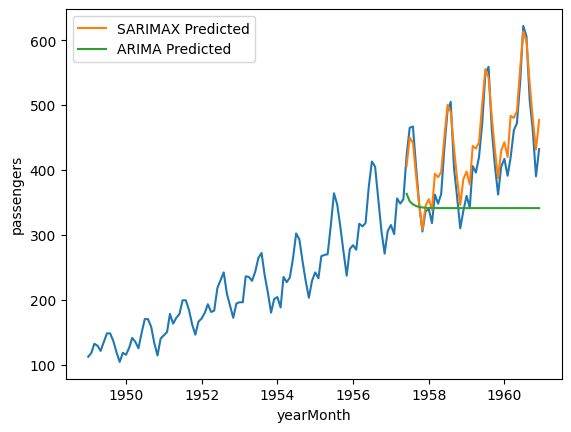

In [64]:
airP.dropna()
sns.lineplot(data=airP,x=airP.index,y='passengers')
sns.lineplot(data=airP,x=airP.index,y='sarimaxPred', label='SARIMAX Predicted')
sns.lineplot(data=airP,x=airP.index,y='arimaPred', label='ARIMA Predicted')

In [51]:
np.sqrt(mean_squared_error(test['passengers'],prediction))

27.484235518419588

In [52]:
futureDate = pd.DataFrame(pd.date_range(start='1961-01-01', end='1962-12-01',freq='MS'),columns=['Dates'])
futureDate.set_index('Dates',inplace=True)
futureDate.head()

""
Dates
1961-01-01
1961-02-01
1961-03-01
1961-04-01
1961-05-01


In [53]:
model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1])

1961-01-01    490.613293
1961-02-01    465.084870
1961-03-01    532.877232
1961-04-01    530.157226
1961-05-01    541.995914
1961-06-01    612.615966
1961-07-01    674.617501
1961-08-01    657.139792
1961-09-01    588.139065
1961-10-01    528.871039
1961-11-01    478.566836
1961-12-01    526.624381
1962-01-01    541.515029
1962-02-01    513.129582
1962-03-01    585.222051
1962-04-01    582.936345
1962-05-01    595.912413
1962-06-01    671.908278
1962-07-01    738.017183
1962-08-01    718.400250
1962-09-01    644.925399
1962-10-01    581.718299
1962-11-01    528.573613
1962-12-01    579.228374
Freq: MS, Name: predicted_mean, dtype: float64

<Axes: xlabel='yearMonth', ylabel='passengers'>

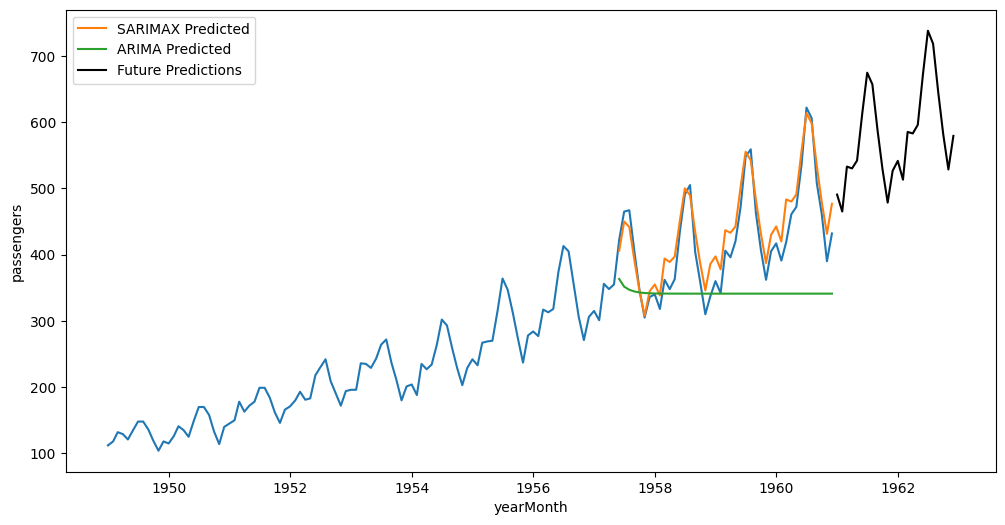

In [69]:
plt.figure(figsize=(12, 6))
airP.dropna()
sns.lineplot(data=airP,x=airP.index,y='passengers')
sns.lineplot(data=airP,x=airP.index,y='sarimaxPred', label='SARIMAX Predicted')
sns.lineplot(data=airP,x=airP.index,y='arimaPred', label='ARIMA Predicted')
future_predictions=model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1])
sns.lineplot(x=futureDate.index, y=future_predictions, color='black', label='Future Predictions')

In [60]:
checkDf = df[['passengers']]
checkDf['diff1'] = checkDf.diff()

C:\Users\Harshita\AppData\Local\Temp\ipykernel_12324\3150410171.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  checkDf['diff1'] = checkDf.diff()


In [61]:
checkDf.head()

,passengers,diff1
yearMonth,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
